In [1]:
!unzip /content/vg_sales_data.zip

Archive:  /content/vg_sales_data.zip
  inflating: vgsales.csv             


# Importing LIbraries

In [14]:
import numpy as np,pandas as pd,seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df.shape

(16598, 11)

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df = df.dropna(how = 'all')

In [10]:
df.shape

(16598, 11)

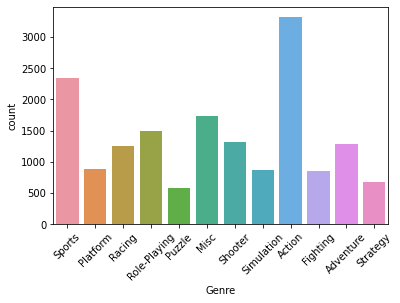

<Figure size 432x288 with 0 Axes>

In [24]:

sns.countplot(data = df, x = 'Genre')
plt.xticks(rotation = 45)
plt.show()
plt.savefig('genre_plot.png')

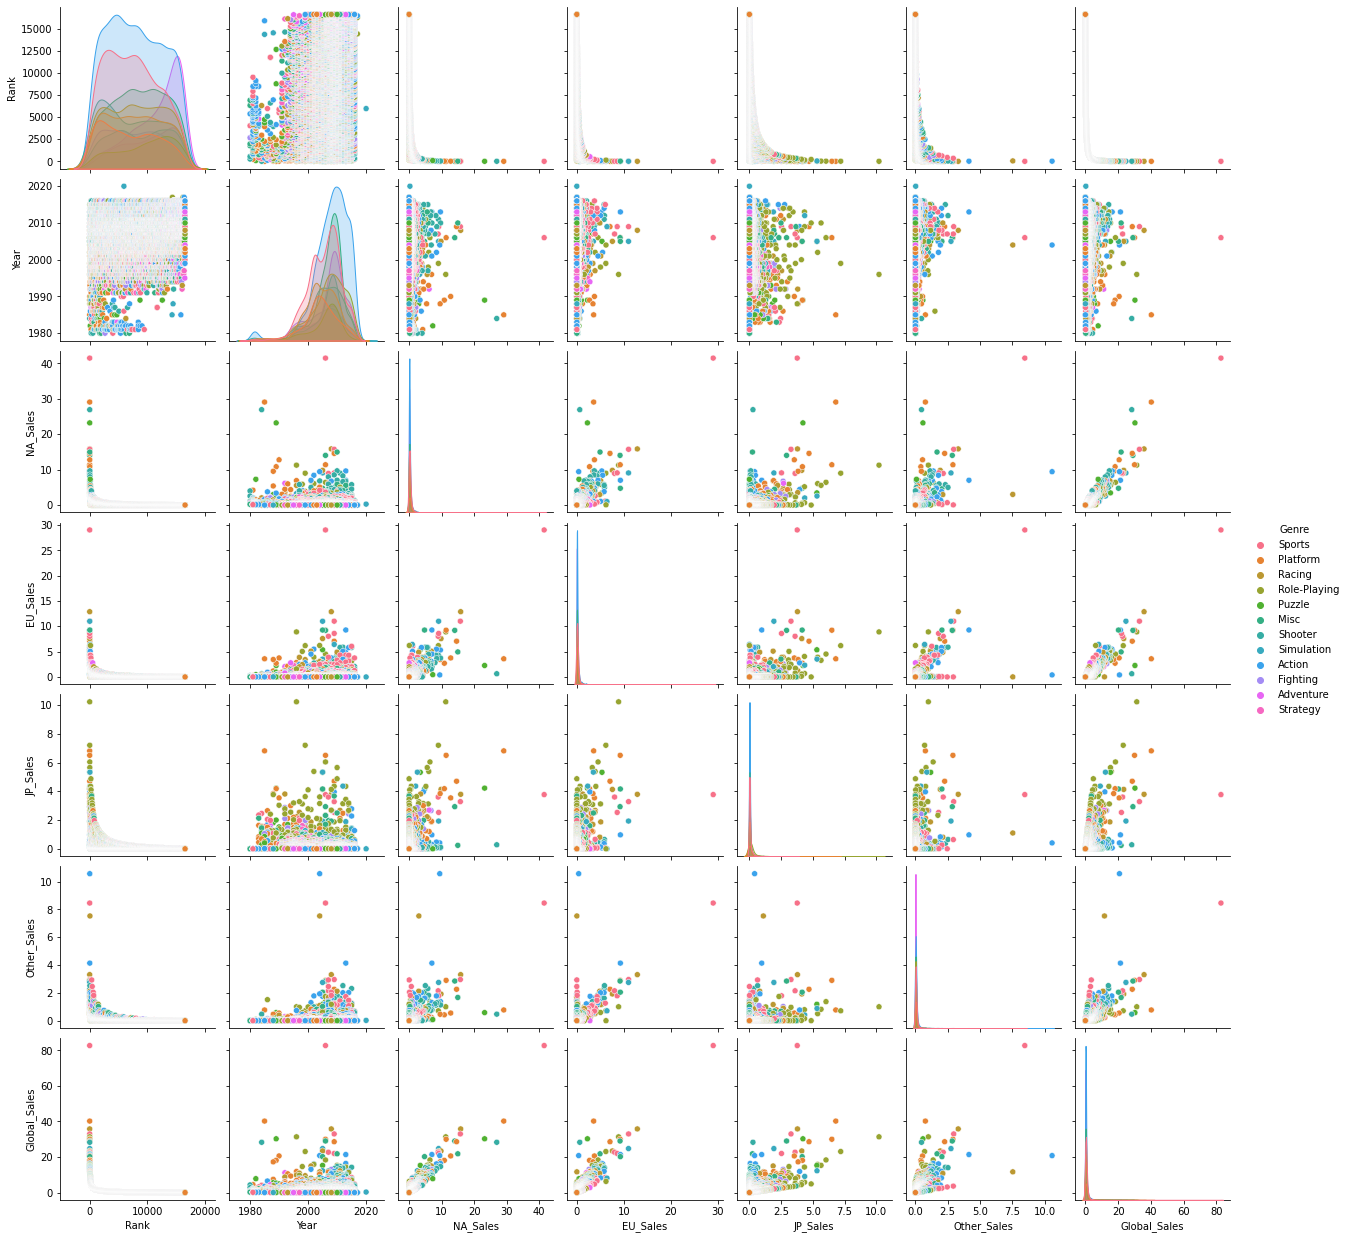

In [23]:
sns.pairplot(df, hue="Genre")
plt.savefig('pairPlt.png')

In [19]:
df.Name.nunique()

11493

In [22]:
[i.upper() for i in df.columns.values]

['RANK',
 'NAME',
 'PLATFORM',
 'YEAR',
 'GENRE',
 'PUBLISHER',
 'NA_SALES',
 'EU_SALES',
 'JP_SALES',
 'OTHER_SALES',
 'GLOBAL_SALES']

In [26]:
df.Platform.value_counts(normalize = True)

DS      0.130317
PS2     0.130196
PS3     0.080070
Wii     0.079829
X360    0.076214
PSP     0.073081
PS      0.072057
PC      0.057838
XB      0.049645
GBA     0.049524
GC      0.033498
3DS     0.030666
PSV     0.024883
PS4     0.020243
N64     0.019219
SNES    0.014399
XOne    0.012833
SAT     0.010423
WiiU    0.008615
2600    0.008013
NES     0.005904
GB      0.005904
DC      0.003133
GEN     0.001627
NG      0.000723
SCD     0.000361
WS      0.000361
3DO     0.000181
TG16    0.000120
GG      0.000060
PCFX    0.000060
Name: Platform, dtype: float64

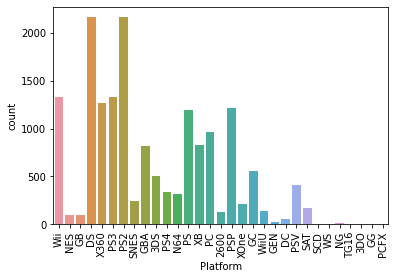

<Figure size 432x288 with 0 Axes>

In [33]:

sns.countplot(data = df, x = 'Platform')
plt.xticks(rotation =90)
plt.show()
plt.savefig('platform_plot.png')

In [34]:
# check the amount of values on each column
for i in df.columns:
  print(f'On column {i} ,  we have  {df[i].nunique()} different unique values')

On column Rank ,  we have  16598 different unique values
On column Name ,  we have  11493 different unique values
On column Platform ,  we have  31 different unique values
On column Year ,  we have  39 different unique values
On column Genre ,  we have  12 different unique values
On column Publisher ,  we have  578 different unique values
On column NA_Sales ,  we have  409 different unique values
On column EU_Sales ,  we have  305 different unique values
On column JP_Sales ,  we have  244 different unique values
On column Other_Sales ,  we have  157 different unique values
On column Global_Sales ,  we have  623 different unique values


By looking at the unique entries in each of the columns,  we can see that most of the columns in  our dataset has high cardinality , and would prove difficult to build a model around